In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth
from math import isnan
df = pd.read_csv('./csvs/lab6.csv',encoding='cp1251')
print(df.head(5))

   id  gender  age  income     product
0   1    Male   19      15  cigarettes
1   2    Male   21      15        milk
2   3  Female   20      16   chocolate
3   4  Female   23      16        milk
4   5  Female   31      17       bread


In [5]:
df = pd.read_csv('./csvs/lab6.csv',encoding='cp1251')

np_df = df.to_numpy()
np_df = [[elem for elem in row[4:] if isinstance(elem,str)] for row in
         np_df]
print(np_df)

[['cigarettes'], ['milk'], ['chocolate'], ['milk'], ['bread'], ['bread'], ['milk'], ['water '], ['water '], ['bread'], ['water '], ['water '], ['chocolate'], ['milk'], ['water '], ['oil'], ['chocolate'], ['oil'], ['chocolate'], ['chocolate'], ['cigarettes'], ['flakes '], ['cigarettes'], ['tangerines'], ['tangerines'], ['cigarettes'], ['tangerines'], ['cigarettes'], ['water '], ['flakes '], ['tangerines'], ['cigarettes'], ['cigarettes'], ['milk'], ['chocolate'], ['milk'], ['bread'], ['bread'], ['milk'], ['water '], ['water '], ['bread'], ['water '], ['water '], ['chocolate'], ['milk'], ['water '], ['oil'], ['chocolate'], ['oil'], ['chocolate'], ['chocolate'], ['cigarettes'], ['flakes '], ['cigarettes'], ['tangerines'], ['tangerines'], ['cigarettes'], ['tangerines'], ['cigarettes'], ['water '], ['flakes '], ['tangerines'], ['cigarettes'], ['cigarettes'], ['milk'], ['chocolate'], ['milk'], ['bread'], ['bread'], ['milk'], ['water '], ['water '], ['bread'], ['water '], ['water '], ['chocola

In [8]:
unique_items = df['product'].unique()
unique_items

array(['cigarettes', 'milk', 'chocolate', 'bread', 'water ', 'oil',
       'flakes ', 'tangerines'], dtype=object)

In [13]:
te = TransactionEncoder()
te_ary = te.fit_transform(np_df)
df_new = pd.DataFrame(te_ary, columns=te.columns_)
df_new.head()


,bread,chocolate,cigarettes,flakes,milk,oil,tangerines,water
0,False,False,True,False,False,False,False,False
1,False,False,False,False,True,False,False,False
2,False,True,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False
4,True,False,False,False,False,False,False,False


In [14]:
fpg = fpgrowth(df_new, min_support=0.03, use_colnames = True)
print(fpg)


    support      itemsets
0  0.186869  (cigarettes)
1  0.131313        (milk)
2  0.156566   (chocolate)
3  0.101010       (bread)
4  0.181818      (water )
5  0.060606         (oil)
6  0.060606     (flakes )
7  0.121212  (tangerines)


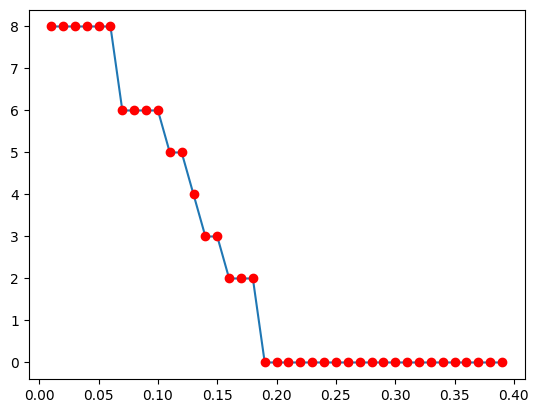

In [15]:
min_support_range = np.arange(0.01, 0.4, 0.01)
itemsets_lengths = []
threshold_supports = []
threshold_lengths = []
last_itemset_len = len(df_new.columns)
for min_support in min_support_range:
    fpg = fpgrowth(df_new, min_support=min_support, use_colnames=True)
    itemsets_lengths.append(len(fpg))
    fpg['length'] = fpg['itemsets'].apply(lambda x: len(x))
    current_itemset_max_len = fpg['length' ].max()
    if isnan(current_itemset_max_len):
        current_itemset_max_len = 0
    if current_itemset_max_len < last_itemset_len:
        last_itemset_len = current_itemset_max_len
    threshold_supports.append(min_support)
    threshold_lengths.append(len(fpg))
plt.figure()
plt.plot(min_support_range.tolist(), itemsets_lengths)
plt.plot(threshold_supports, threshold_lengths, 'ro')
plt.show()